<a href="https://colab.research.google.com/github/Omar630603/DIP-Course-2022/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

Enter brightness value: 50


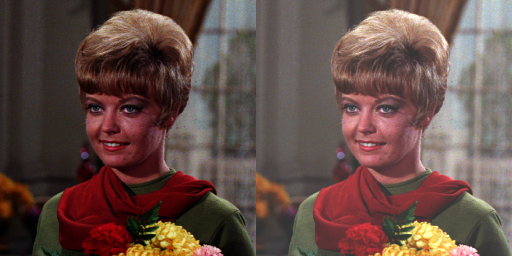

In [3]:
original = cv.imread('/content/drive/MyDrive/DIP/Images/female.tiff')
try:
  brightness = int(input('Enter brightness value: '))
except ValueError:
  print('Error, not a number!')

brightness_images = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_images[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_images))
cv2_imshow(final_frame)

Enter brightness value: 100
Enter contrast value: -50


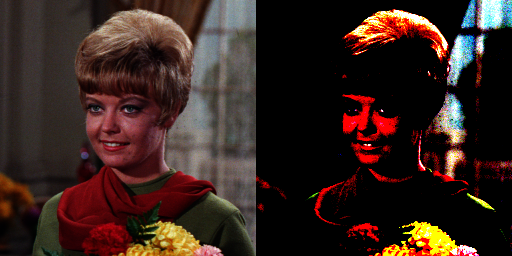

In [14]:
original = cv.imread('/content/drive/MyDrive/DIP/Images/female.tiff')

def apply_contrast(input_img, brightness = 0, contrast = 0):
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow)/255
        gamma_b = shadow
        
        contrast_image = cv.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
    else:
        contrast_image = input_img.copy()

    if contrast != 0:
        f = 131*(contrast + 127)/(127*(131-contrast))
        alpha_c = f
        gamma_c = 127*(1-f)       
        contrast_image = cv.addWeighted(input_img, alpha_c, input_img, 0, gamma_c)

    return contrast_image

try:
  brightness = int(input('Enter brightness value: '))  
  contrast = int(input('Enter contrast value: '))  
  final_frame = cv.hconcat((original, apply_contrast(original, contrast, brightness)))
  cv2_imshow(final_frame)
except ValueError:
  print('Error, not a number!')